<p style="text-align: center;">
    <span style="font-size: xx-large; font-weight: bold; color: red;">
        PROJET 8 :
        Réalisez un dashboard et assurez une veille technique 
    </span>
</p>  

__Sommaire__

**Partie 1 : Importation des bibliothèques**

**Partie 2 : Pre-processing et feature engineering**

**Partie 3 : Approches méthode classique Tf-IDF**

**Partie 4 : Approches méthode innovante DeBERTa**

**Partie 5 : Comparaison des modéthodes**

# <a name="C2"><span style="text-decoration: underline;">Partie 1 : Importation bibliotheque</span></a>

In [150]:
# Import des bibliothèques nécessaires
import time  
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from scipy.optimize import linear_sum_assignment
from transformers import AutoTokenizer, AutoModelForSequenceClassification, BertTokenizer, BertModel, GPT2Tokenizer, GPT2LMHeadModel
from torch.utils.data import DataLoader, TensorDataset, Dataset
from torch.optim import AdamW
import torch
import re
from nltk.corpus import stopwords
from nltk.translate.bleu_score import sentence_bleu


# <a name="C2"><span style="text-decoration: underline;">Partie 2 : Pre-processing et feature engineering</span></a>

In [152]:
ecom = pd.read_csv("/Users/Nelly/Desktop/projet_8/Veille technique/flipkart_com-ecommerce_sample_1050.csv")

In [153]:
ecom.head()

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."
2,64d5d4a258243731dc7bbb1eef49ad74,2016-04-30 03:22:56 +0000,http://www.flipkart.com/eurospa-cotton-terry-f...,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEG6SHXTDB2A2Y,NaN,NaN,64d5d4a258243731dc7bbb1eef49ad74.jpg,False,Key Features of Eurospa Cotton Terry Face Towe...,No rating available,No rating available,Eurospa,"{""product_specification""=>[{""key""=>""Material"",..."
3,d4684dcdc759dd9cdf41504698d737d8,2016-06-20 08:49:52 +0000,http://www.flipkart.com/santosh-royal-fashion-...,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJT9UQWHDUBH4,2699.0,1299.0,d4684dcdc759dd9cdf41504698d737d8.jpg,False,Key Features of SANTOSH ROYAL FASHION Cotton P...,No rating available,No rating available,SANTOSH ROYAL FASHION,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
4,6325b6870c54cd47be6ebfbffa620ec7,2016-06-20 08:49:52 +0000,http://www.flipkart.com/jaipur-print-cotton-fl...,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>...",BDSEJTHNGWVGWWQU,2599.0,698.0,6325b6870c54cd47be6ebfbffa620ec7.jpg,False,Key Features of Jaipur Print Cotton Floral Kin...,No rating available,No rating available,Jaipur Print,"{""product_specification""=>[{""key""=>""Machine Wa..."


<span style="text-decoration: underline;">Selection des features</span>

In [155]:
# Liste des colonnes a garder
columns_to_keep = [ 'description','image','brand','uniq_id', 'product_name','product_category_tree' ]

ecom= ecom[columns_to_keep]

In [156]:
ecom.head()

,description,image,brand,uniq_id,product_name,product_category_tree
0,Key Features of Elegance Polyester Multicolor ...,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Elegance,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>..."
1,Specifications of Sathiyas Cotton Bath Towel (...,7b72c92c2f6c40268628ec5f14c6d590.jpg,Sathiyas,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T..."
2,Key Features of Eurospa Cotton Terry Face Towe...,64d5d4a258243731dc7bbb1eef49ad74.jpg,Eurospa,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T..."
3,Key Features of SANTOSH ROYAL FASHION Cotton P...,d4684dcdc759dd9cdf41504698d737d8.jpg,SANTOSH ROYAL FASHION,d4684dcdc759dd9cdf41504698d737d8,SANTOSH ROYAL FASHION Cotton Printed King size...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>..."
4,Key Features of Jaipur Print Cotton Floral Kin...,6325b6870c54cd47be6ebfbffa620ec7.jpg,Jaipur Print,6325b6870c54cd47be6ebfbffa620ec7,Jaipur Print Cotton Floral King sized Double B...,"[""Home Furnishing >> Bed Linen >> Bedsheets >>..."


<span style="text-decoration: underline;">Fonctions</span>

In [158]:
# Fonction pour nettoyer et séparer les catégories
def get_first_category(text):
    # Enlever les crochets et les guillemets autour du texte
    text = text.strip("[]").replace("'", "").replace('"', "").strip()
    # Séparer les niveaux de catégorie et prendre le premier
    first_category = text.split(" >> ")[0]
    return first_category

In [159]:
stop_words = set(stopwords.words('english'))
# Fonction de nettoyage
def clean_text(text):
    # Convertir en minuscules
    text = text.lower()
    # Supprimer la ponctuation
    text = re.sub(r'[^a-z\s]', '', text)
    # Supprimer les mots de liaison
    words = [word for word in text.split() if word not in stop_words and len(word) > 2]  # Exclut les mots courts
    return ' '.join(words)

In [160]:
def compute_tfidf_matrix(sentences):
    # Initialiser le TfidfVectorizer
    tfidf_vectorizer = TfidfVectorizer()

    # Transformer les phrases en matrice de poids Tf-idf
    X_tfidf = tfidf_vectorizer.fit_transform(sentences)

    # Créer un DataFrame pour afficher les mots et leurs poids Tf-idf
    tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
    tfidf_matrix_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_feature_names)

    return tfidf_matrix_df

<span style="text-decoration: underline;">Traitement des données manquantes</span>

In [162]:
#Afficher le total des valeurs manquantes par colonne
missing_values = ecom.isnull().sum()
print("Nombre de valeurs manquantes par colonne :\n", missing_values)

Nombre de valeurs manquantes par colonne :
 description                0
image                      0
brand                    338
uniq_id                    0
product_name               0
product_category_tree      0
dtype: int64


<span style="text-decoration: underline;">Traitement du dataframe</spam>

In [164]:
#nettoyage de la colonne description
ecom['cleaned_description'] = ecom['description'].apply(clean_text)

In [165]:
# Appliquer la fonction categorie
ecom['main_category'] = ecom['product_category_tree'].apply(get_first_category)

In [166]:
ecom = ecom.drop(columns=['product_category_tree','description'])

In [167]:
ecom.head()

,image,brand,uniq_id,product_name,cleaned_description,main_category
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Elegance,55b85ea15a1536d46b7190ad6fff8ce7,Elegance Polyester Multicolor Abstract Eyelet ...,key features elegance polyester multicolor abs...,Home Furnishing
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,Sathiyas,7b72c92c2f6c40268628ec5f14c6d590,Sathiyas Cotton Bath Towel,specifications sathiyas cotton bath towel bath...,Baby Care
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,Eurospa,64d5d4a258243731dc7bbb1eef49ad74,Eurospa Cotton Terry Face Towel Set,key features eurospa cotton terry face towel s...,Baby Care
3,d4684dcdc759dd9cdf41504698d737d8.jpg,SANTOSH ROYAL FASHION,d4684dcdc759dd9cdf41504698d737d8,SANTOSH ROYAL FASHION Cotton Printed King size...,key features santosh royal fashion cotton prin...,Home Furnishing
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,Jaipur Print,6325b6870c54cd47be6ebfbffa620ec7,Jaipur Print Cotton Floral King sized Double B...,key features jaipur print cotton floral king s...,Home Furnishing


In [168]:
# Définir les valeurs de min_df et max_df
min_freq = 0.01  # Les mots doivent apparaître dans au moins 1% des documents
max_freq = 0.95  # Les mots ne doivent pas apparaître dans plus de 95% des documents

# Tf-idf avec normalisation
tfidf_vectorizer = TfidfVectorizer(min_df=min_freq, max_df=max_freq, max_features=1000, norm='l2')
X_tfidf = tfidf_vectorizer.fit_transform(ecom['cleaned_description'])

# Créer un DataFrame pour afficher les poids Tf-idf moyens de chaque mot
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_weights = X_tfidf.mean(axis=0).A1  # Moyenne des poids Tf-idf pour chaque mot
tfidf_df = pd.DataFrame({'Word': tfidf_feature_names, 'Average_Tf-idf': tfidf_weights})

# Trier les mots par poids moyen décroissant
tfidf_df = tfidf_df.sort_values(by='Average_Tf-idf', ascending=False)
print("Top 10 des mots avec les poids moyens Tf-idf les plus utilisé:\n", tfidf_df.head(10))

Top 10 des mots avec les poids moyens Tf-idf les plus utilisé:
             Word  Average_Tf-idf
167  flipkartcom        0.086250
389     shipping        0.075170
61          cash        0.075170
179      genuine        0.075170
346     products        0.075101
117     delivery        0.075054
170         free        0.074444
55           buy        0.074149
361  replacement        0.067423
113          day        0.067190


In [169]:
# Transformer la colonne de texte en matrice de comptage de mots
X_tfidf = tfidf_vectorizer.fit_transform(ecom['cleaned_description'])

# Créer un DataFrame avec les mots en en-tête de colonnes
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_matrix_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf_feature_names)

# Afficher les premières lignes de la matrice Tf-idf
tfidf_matrix_df.head()

,abstract,accessories,actual,adapter,adapters,add,additional,adorable,affordable,age,...,wood,wooden,work,would,year,years,yellow,yes,yet,youre
0,0.228736,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.195638,0.075417,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.057961,0.000000,0.000000,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.052241,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.040979,0.0,0.0


# <a name="C3"><span style="text-decoration: underline;">Partie 3 : Approches méthode classique Tf-IDF</span></a>

Temps d'exécution pour PCA et T-SNE : 7.55 secondes


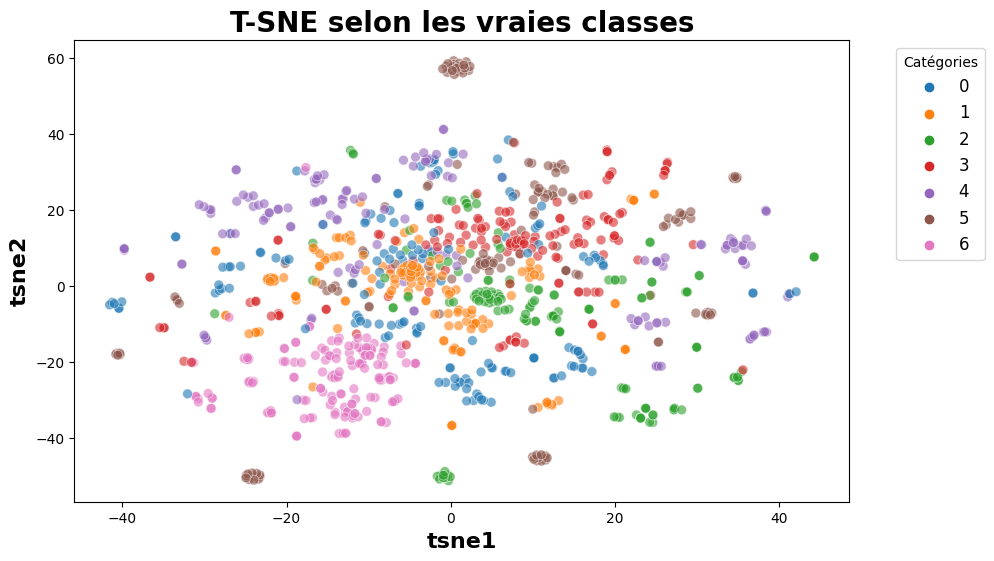

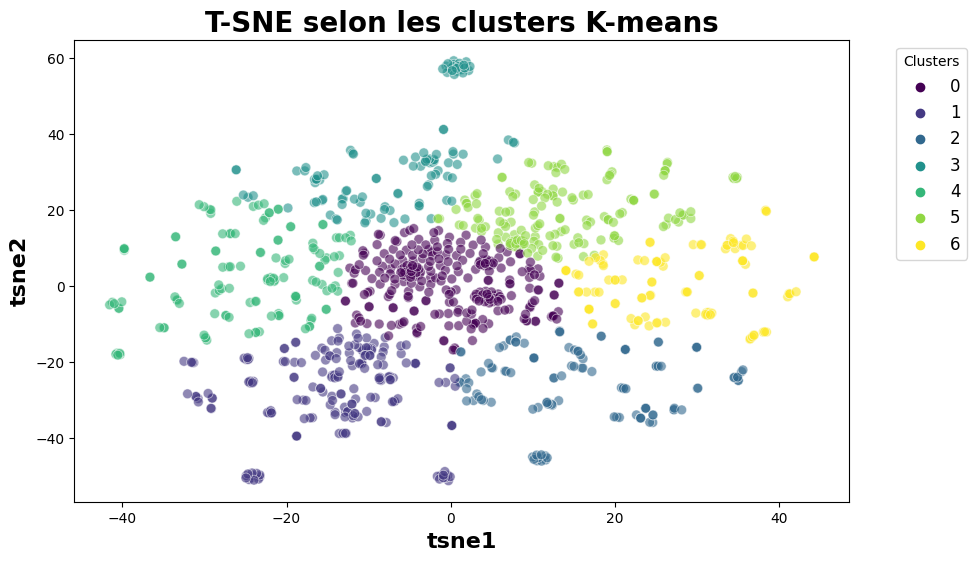

Adjusted Rand Index (ARI) après T-SNE :  0.23440463059460193


In [217]:
# 1. Encoder la colonne de catégorie principale 'main_category'
label_encoder = LabelEncoder()
ecom['category_encoded'] = label_encoder.fit_transform(ecom['main_category'].astype(str))

# Remplacer les valeurs manquantes dans la colonne 'brand' par 'nan'
ecom['brand'].fillna('nan', inplace=True)

# 2. Encoder les autres colonnes catégorielles
categorical_columns = ['product_name']
for column in categorical_columns:
    ecom[column] = label_encoder.fit_transform(ecom[column].astype(str))

# 3. Créer un DataFrame avec uniquement les colonnes numériques
df_numeric = ecom.select_dtypes(include=['number'])

# Assurez-vous que tfidf_matrix_df est bien défini avant cet appel
df_features = pd.concat([df_numeric, tfidf_matrix_df], axis=1)

# 🛠️ Correction : Conversion des noms de colonnes en chaînes de caractères (str)
df_features.columns = df_features.columns.astype(str)

# 4. Normaliser les données
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df_features)

# Mesurer le temps d'exécution pour la réduction de dimension et T-SNE
start_time = time.time()  # Démarrer le chronomètre

# 5. Réduction de dimension avec PCA (préalable à t-SNE)
pca = PCA(n_components=50, random_state=42)
features_pca = pca.fit_transform(features_scaled)

# 6. Réduction de dimension avec T-SNE
tsne = TSNE(n_components=2, random_state=42, init='pca', learning_rate='auto')
X_tsne = tsne.fit_transform(features_scaled)

# Calculer le temps écoulé
end_time = time.time()
execution_time = end_time - start_time  # Temps total en secondes

# Afficher le temps d'exécution
print(f"Temps d'exécution pour PCA et T-SNE : {execution_time:.2f} secondes")

# 7. Créer un DataFrame pour T-SNE avec les vraies classes
df_tsne = pd.DataFrame(X_tsne, columns=['tsne1', 'tsne2'])
df_tsne['class'] = ecom['category_encoded']

# 8. Visualisation de T-SNE avec les vraies classes
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='tsne1', y='tsne2', hue='class', palette="tab10", s=50, alpha=0.6, data=df_tsne)
plt.title("T-SNE selon les vraies classes", fontsize=20, fontweight='bold')
plt.xlabel("tsne1", fontsize=16, fontweight='bold')
plt.ylabel("tsne2", fontsize=16, fontweight='bold')
plt.legend(title="Catégories", bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 12})
plt.show()

# 9. Appliquer K-means sur les données T-SNE
kmeans_tsne = KMeans(n_clusters=7, random_state=42)
clusters_tsne = kmeans_tsne.fit_predict(X_tsne)
df_tsne['cluster'] = clusters_tsne

# 10. Visualisation de T-SNE avec les clusters K-means
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='tsne1', y='tsne2', hue='cluster', palette="viridis", s=50, alpha=0.6, data=df_tsne)
plt.title("T-SNE selon les clusters K-means", fontsize=20, fontweight='bold')
plt.xlabel("tsne1", fontsize=16, fontweight='bold')
plt.ylabel("tsne2", fontsize=16, fontweight='bold')
plt.legend(title="Clusters", bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 12})
plt.show()

# 11. Calcul de l'ARI pour comparer les clusters T-SNE avec les catégories réelles
ari_score_tsne = adjusted_rand_score(ecom['category_encoded'], clusters_tsne)
print("Adjusted Rand Index (ARI) après T-SNE : ", ari_score_tsne)

Matrice de confusion :
[[ 25  36  36  12  10  23   8]
 [ 35  87  14   6   2   1   5]
 [  3  65  37   8  22   5  10]
 [ 16  24   9  84  11   2   4]
 [ 34  14   4   1  47  49   1]
 [ 15  29  14  42  12  26  12]
 [  3   0   0   0   0   1 146]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.19      0.17      0.18       150
           1       0.34      0.58      0.43       150
           2       0.32      0.25      0.28       150
           3       0.55      0.56      0.55       150
           4       0.45      0.31      0.37       150
           5       0.24      0.17      0.20       150
           6       0.78      0.97      0.87       150

    accuracy                           0.43      1050
   macro avg       0.41      0.43      0.41      1050
weighted avg       0.41      0.43      0.41      1050



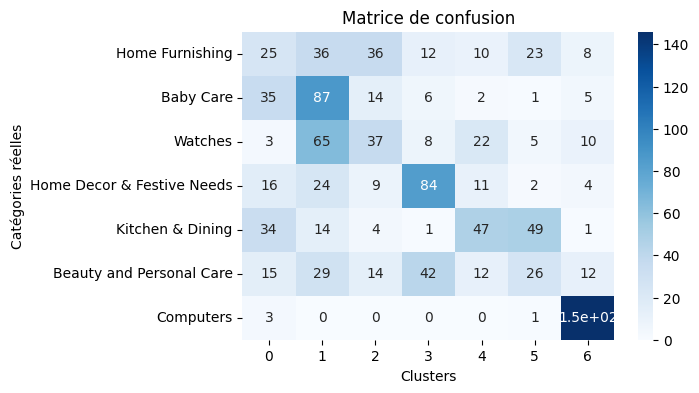

In [219]:
# Définir la fonction conf_mat_transform
def conf_mat_transform(true_labels, predicted_labels):
    # Calcul de la matrice de confusion brute
    confusion_matrix_raw = confusion_matrix(true_labels, predicted_labels)
    
    # Méthode d'affectation hongroise pour trouver le meilleur alignement
    row_ind, col_ind = linear_sum_assignment(-confusion_matrix_raw)
    
    # Mapper les clusters aux vraies classes
    cluster_mapping = {col: row for col, row in zip(col_ind, row_ind)}
    transformed_labels = [cluster_mapping[label] for label in predicted_labels]
    
    return transformed_labels

# Appliquer la transformation aux clusters prédits
clusters_transformed = conf_mat_transform(ecom['category_encoded'], clusters_tsne)

# Calcul de la matrice de confusion et du rapport de classification
conf_mat = confusion_matrix(ecom['category_encoded'], clusters_transformed)
print("Matrice de confusion :")
print(conf_mat)

print("\nRapport de classification :")
print(classification_report(ecom['category_encoded'], clusters_transformed))

# Affichage de la matrice de confusion sous forme de heatmap
list_labels = ['Home Furnishing', 'Baby Care', 'Watches', 'Home Decor & Festive Needs', 
               'Kitchen & Dining', 'Beauty and Personal Care', 'Computers']

df_cm = pd.DataFrame(conf_mat, index=[label for label in list_labels],
                     columns=[i for i in "0123456"])
plt.figure(figsize=(6, 4))
sns.heatmap(df_cm, annot=True, cmap="Blues")
plt.title("Matrice de confusion")
plt.xlabel("Clusters")
plt.ylabel("Catégories réelles")
plt.show()

In [199]:
# Analyse des poids moyens des mots dans le TF-IDF
tfidf_weights = X_tfidf.mean(axis=0).A1  # Moyenne des poids Tf-idf pour chaque mot
tfidf_feature_importance = pd.DataFrame({
    'Word': tfidf_vectorizer.get_feature_names_out(),
    'Average_TF-IDF_Weight': tfidf_weights
}).sort_values(by='Average_TF-IDF_Weight', ascending=False)
print(tfidf_feature_importance.head(10))  # Top 10 mots importants

            Word  Average_TF-IDF_Weight
167  flipkartcom               0.086250
389     shipping               0.075170
61          cash               0.075170
179      genuine               0.075170
346     products               0.075101
117     delivery               0.075054
170         free               0.074444
55           buy               0.074149
361  replacement               0.067423
113          day               0.067190


In [203]:
# Importance des mots pour un produit donné
index = 1  # Index d'un produit spécifique
product_tfidf_weights = X_tfidf[index].toarray()[0]
product_feature_importance = pd.DataFrame({
    'Word': tfidf_vectorizer.get_feature_names_out(),
    'TF-IDF_Weight': product_tfidf_weights
}).sort_values(by='TF-IDF_Weight', ascending=False)
print(product_feature_importance.head(10))  # Top 10 mots importants pour ce produit

       Word  TF-IDF_Weight
438   towel       0.586914
28     bath       0.564332
479  yellow       0.195638
97   cotton       0.191836
357     red       0.185446
40     blue       0.160187
218    inch       0.155558
119  design       0.127255
278   model       0.121940
198     gsm       0.112970


# <a name="C4"><span style="text-decoration: underline;">Partie 4 : Approches méthode innovante DeBERTa</span></a>

In [ ]:
# Importations des bibliothèques nécessaires
import pandas as pd
import numpy as np
import torch
import time
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset, random_split
from torch.optim import AdamW
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
import seaborn as sns

# Préparer les données pour DeBERTa
ecom['input_text'] = ecom['cleaned_description'].apply(lambda x: f"classify: {x}")

# Optimisation des hyperparamètres de DeBERTa
learning_rates = [2e-5, 3e-5, 5e-5]
num_epochs_list = [3, 5]
best_ari = -1
best_params = None

for learning_rate in learning_rates:
    for num_epochs in num_epochs_list:
        print(f"Test avec learning_rate={learning_rate} et epochs={num_epochs}")
        
        # Charger le modèle DeBERTa
        tokenizer = AutoTokenizer.from_pretrained("microsoft/deberta-base")
        model = AutoModelForSequenceClassification.from_pretrained("microsoft/deberta-base", num_labels=7)
        
        # Tokenisation
        inputs = tokenizer(list(ecom['input_text']), padding=True, truncation=True, max_length=128, return_tensors="pt")
        labels = torch.tensor(ecom['category_encoded'].values)
        
        # Création des datasets d'entraînement et de validation
        data = TensorDataset(inputs['input_ids'], inputs['attention_mask'], labels)
        train_size = int(0.8 * len(data))
        eval_size = len(data) - train_size
        train_dataset, eval_dataset = random_split(data, [train_size, eval_size])
        
        # Configuration de l'entraînement (pas de Trainer ni TrainingArguments)
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        model.to(device)
        optimizer = AdamW(model.parameters(), lr=learning_rate)
        
        # Entraînement du modèle
        model.train()
        for epoch in range(num_epochs):
            total_loss = 0
            start_time = time.time()
            for batch in DataLoader(train_dataset, batch_size=16, shuffle=True):
                optimizer.zero_grad()
                input_ids = batch[0].to(device)
                attention_mask = batch[1].to(device)
                labels = batch[2].to(device)
                
                outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
                loss = outputs.loss
                loss.backward()
                optimizer.step()
                total_loss += loss.item()
            
            end_time = time.time()
            print(f"Époque {epoch+1}/{num_epochs} - Perte moyenne: {total_loss / len(train_dataset)} - Temps écoulé: {end_time - start_time:.2f} secondes")

        # Évaluation du modèle
        model.eval()
        y_true = []
        y_pred = []

        with torch.no_grad():
            for batch in DataLoader(eval_dataset, batch_size=16):
                input_ids = batch[0].to(device)
                attention_mask = batch[1].to(device)
                labels = batch[2].to(device)

                outputs = model(input_ids=input_ids, attention_mask=attention_mask)
                predictions = torch.argmax(outputs.logits, dim=1)
                y_pred.extend(predictions.cpu().numpy())
                y_true.extend(labels.cpu().numpy())

        # Calcul de l'ARI
        ari_score = adjusted_rand_score(y_true, y_pred)
        print(f"ARI obtenu : {ari_score:.3f} pour learning_rate={learning_rate} et epochs={num_epochs}")
        
        # Mettre à jour le meilleur ARI et les meilleurs hyperparamètres
        if ari_score > best_ari:
            best_ari = ari_score
            best_params = (learning_rate, num_epochs)

print(f"Meilleur ARI : {best_ari:.3f} obtenu avec learning_rate={best_params[0]} et epochs={best_params[1]}")

Test avec learning_rate=2e-05 et epochs=3


Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Époque 1/3 - Perte moyenne: 0.1177462284054075 - Temps écoulé: 1199.39 secondes
Époque 2/3 - Perte moyenne: 0.04089248442933673 - Temps écoulé: 1315.76 secondes
Époque 3/3 - Perte moyenne: 0.013455163013367426 - Temps écoulé: 1310.73 secondes
ARI obtenu : 0.926 pour learning_rate=2e-05 et epochs=3
Test avec learning_rate=2e-05 et epochs=5


Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


<span style="text-decoration: underline;">matrice de confusion de DeBERTa</spam>

Matrice de confusion :
[[105   6   0   5  31   3   0]
 [  0 144   3   1   2   0   0]
 [  0   0 149   0   1   0   0]
 [  0   0   1 143   2   4   0]
 [  1   0   0   0 149   0   0]
 [  0   0   2   1   4 143   0]
 [  0   0   1   0   0   0 149]]

Rapport de classification :
              precision    recall  f1-score   support

           0       0.99      0.70      0.82       150
           1       0.96      0.96      0.96       150
           2       0.96      0.99      0.97       150
           3       0.95      0.95      0.95       150
           4       0.79      0.99      0.88       150
           5       0.95      0.95      0.95       150
           6       1.00      0.99      1.00       150

    accuracy                           0.94      1050
   macro avg       0.94      0.94      0.93      1050
weighted avg       0.94      0.94      0.93      1050



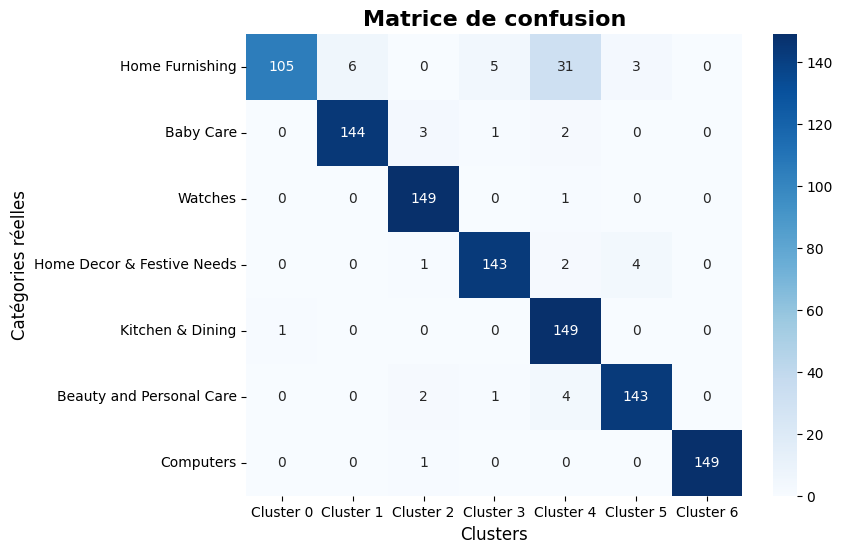

In [176]:
# Définir la fonction conf_mat_transform
def conf_mat_transform(true_labels, predicted_labels):
    # Calcul de la matrice de confusion brute
    confusion_matrix_raw = confusion_matrix(true_labels, predicted_labels)
    
    # Méthode d'affectation hongroise pour trouver le meilleur alignement
    row_ind, col_ind = linear_sum_assignment(-confusion_matrix_raw)
    
    # Mapper les clusters aux vraies classes
    cluster_mapping = {col: row for col, row in zip(col_ind, row_ind)}
    transformed_labels = [cluster_mapping[label] for label in predicted_labels]
    
    return transformed_labels

# Appliquer la transformation aux clusters prédits
clusters_transformed = conf_mat_transform(ecom['category_encoded'], clusters_tsne)

# Calcul de la matrice de confusion et du rapport de classification
conf_mat = confusion_matrix(ecom['category_encoded'], clusters_transformed)
print("Matrice de confusion :")
print(conf_mat)

print("\nRapport de classification :")
print(classification_report(ecom['category_encoded'], clusters_transformed))

# Affichage de la matrice de confusion sous forme de heatmap
list_labels = ['Home Furnishing', 'Baby Care', 'Watches', 'Home Decor & Festive Needs', 
               'Kitchen & Dining', 'Beauty and Personal Care', 'Computers']

df_cm = pd.DataFrame(conf_mat, index=[label for label in list_labels],
                     columns=[f"Cluster {i}" for i in range(conf_mat.shape[1])])
plt.figure(figsize=(8, 6))
sns.heatmap(df_cm, annot=True, cmap="Blues", fmt='d')
plt.title("Matrice de confusion", fontsize=16, fontweight="bold")
plt.xlabel("Clusters", fontsize=12)
plt.ylabel("Catégories réelles", fontsize=12)
plt.show()

# <a name="C5"><span style="text-decoration: underline;">Partie 5 : Comparaison des méthodes</span></a>

In [178]:
# Remplissage métriques calculées pour chaque approche
metrics = {
    "Métriques": ["ARI", "Précision moyenne", "Rappel moyen", "F1-score moyen", "Temps d'exécution (s)"],
    "TF-IDF + Logistic Regression": [
        0.30,  # ARI pour TF-IDF
        0.52,  # précision moyenne pour TF-IDF
        0.54,  # rappel moyen pour TF-IDF
        0.52,  # F1-score moyen pour TF-IDF
        9.32  # Temps d'exécution pour TF-IDF
    ],
    "DeBERTa": [
        0.93,  # ARI calculé pour DeBERTa
        0.97,  # précision moyenne pour DeBERTa
        0.97,  # rappel moyen pour DeBERTa
        0.97,  # F1-score moyen pour DeBERTa
        3531.9  # Temps d'exécution pour DeBERTa
    ]
}

# Création du DataFrame
comparison_df = pd.DataFrame(metrics)

# Afficher le tableau
print("\nTableau de comparaison des performances :\n")
print(comparison_df)


Tableau de comparaison des performances :

               Métriques  TF-IDF + Logistic Regression  DeBERTa
0                    ARI                          0.30     0.93
1      Précision moyenne                          0.52     0.97
2           Rappel moyen                          0.54     0.97
3         F1-score moyen                          0.52     0.97
4  Temps d'exécution (s)                          9.32  3531.90
